In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load dataset and plot actual labels

In [2]:
df = pd.read_csv('data.csv')
dfarr = df.to_numpy()

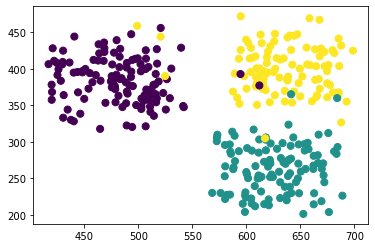

In [3]:
dfx = dfarr[:,0]
dfy = dfarr[:,1]


dfCluster = dfarr[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(dfx, dfy, c=dfCluster, s=50)


plt.show()

Clustering

In [4]:
ds = dfarr[:,:2]
# division by zero constant
epsilon = 1e-5

# range of values for attributes
# range is an n-dim row vector for n attributes
r = ds.max(axis=0) - ds.min(axis=0)

# tolerance 
t = 25
# percent
t = t*.01

# cluster assignment step 1

N = ds.shape[0] # number of examples
n = ds.shape[1] # number of features


ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)

# number of attributes matching between each pair of examples
attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
mask = attributes == n

# cluster count
cluster_count = mask.sum(axis=0)
mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


# for each centroid/cluster, assign top k% to that cluster
k = 10
k *= 0.01
clusters = np.zeros((N,N)) # rows: examples; columns: clusters
top = k*cluster_count
for i in range(N):
    # Eucledian distance
    d = np.sqrt(np.sum((ds-centroids[i])**2,axis=1))
    # top k% 
    ki = int(top[i])
    examples = np.argsort(d)[:ki+1] 
    clusters[examples,i] = 1
    
# recompute centroids
centroids = (ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).sum(axis=1)/np.reshape(np.tile(clusters.sum(axis=0),(1,1)),(N,1))
    
# pick top x clusters
x = 3
topx = np.argsort(clusters.sum(axis=0))[:x]
centroids = centroids[topx]

# for multiple memberships, use Eucledian distance measure to find best cluster for each example
clusters_best = np.zeros((N,N))
final_clusters = np.zeros((N,1))
for i in range(N):
    d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
    idx = np.argmin(d)
    clusters_best[i,idx] = 1    
    final_clusters[i] = idx

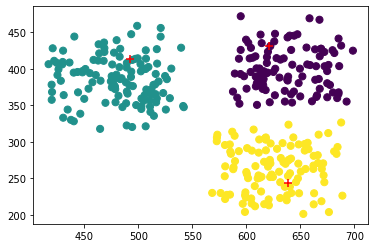

In [5]:
x = ds[:,0]
y = ds[:,1]


Cluster = final_clusters
centers = centroids[:,:2]

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, c=Cluster, s=50)
for i, j in centers:
    ax.scatter(i, j, s=50, c='red', marker='+')

plt.show()

As a class

In [20]:
class Cluster:
    def __init__(self):
        pass
    def cluster(self,ds,t,k,x):
        # division by zero constant
        epsilon = 1e-5

        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        t = t*.01
        # top k%
        k = k*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features


        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)

        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


        # for each centroid/cluster, assign top k% to that cluster
        
        clusters = np.zeros((N,N)) # rows: examples; columns: clusters
        top = k*cluster_count
        for i in range(N):
            # Eucledian distance
            d = np.sqrt(np.sum((ds-centroids[i])**2,axis=1))
            # cosine distance
#             d = 1 - np.sum(ds*centroids[i],axis=1)
            # top k% 
            ki = int(top[i])
            examples = np.argsort(d)[:ki+1] 
            clusters[examples,i] = 1

        # recompute centroids
        centroids = (ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).sum(axis=1)/np.reshape(np.tile(clusters.sum(axis=0),(1,1)),(N,1))

        # pick top x clusters
        topx = np.argsort(clusters.sum(axis=0))[:x]
#         topx = np.argsort((ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).std(axis=1))[:x]
        centroids = centroids[topx]

        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters_best = np.zeros((N,N))
        final_clusters = np.zeros((N,1))
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters_best[i,idx] = 1    
            final_clusters[i] = idx
            
        return centroids,final_clusters
    
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:2]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        
        

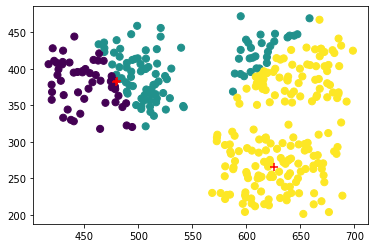

In [21]:
c = Cluster()
centroids,final_clusters = c.cluster(ds,25,10,3)
c.show(ds,centroids,final_clusters)

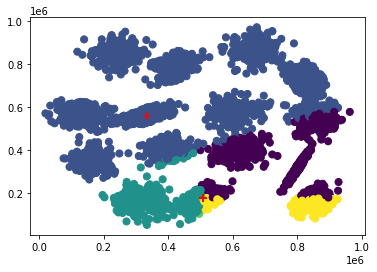

In [22]:
df = pd.read_csv('data_s1.csv')
dfarr = df.to_numpy()
ds2 = dfarr[:,:2]
c = Cluster()
centroids,final_clusters = c.cluster(ds2,5,5,5)
c.show(ds2,centroids,final_clusters)

In [28]:
class Cluster2:
    def __init__(self):
        pass
    def cluster(self,ds,t,x):
        # division by zero constant
        epsilon = 1e-5

        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        t = t*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features


        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)

        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


        # for each centroid/cluster, assign top k% to that cluster
        
        clusters = np.zeros((N,N)) # rows: examples; columns: clusters
        for i in range(N):
            # Eucledian distance
            d = np.sqrt(np.sum((ds-centroids[i])**2,axis=1))
            ki = int(cluster_count[i])
            examples = np.argsort(d)[:ki+1] 
            clusters[examples,i] = 1

        # recompute centroids
        centroids = (ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).sum(axis=1)/np.reshape(np.tile(clusters.sum(axis=0),(1,1)),(N,1))

        # pick top x clusters
        topx = np.argsort(clusters.sum(axis=0))[:x]
#         topx = np.argsort((ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).std(axis=1))[:x]
        centroids = centroids[topx]

        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters_best = np.zeros((N,N))
        final_clusters = np.zeros((N,1))
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters_best[i,idx] = 1    
            final_clusters[i] = idx
            
        return centroids,final_clusters
    
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:2]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        
        

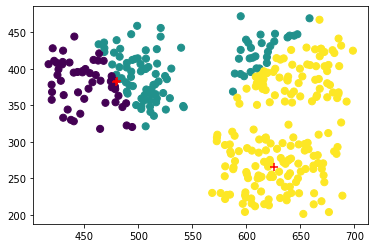

In [29]:
c = Cluster()
centroids,final_clusters = c.cluster(ds,25,10,3)
c.show(ds,centroids,final_clusters)

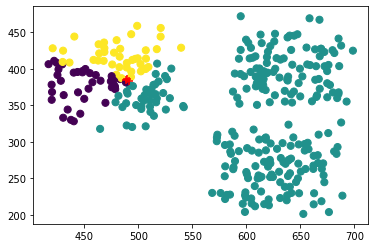

In [30]:
c = Cluster2()
centroids,final_clusters = c.cluster(ds,15,3)
c.show(ds,centroids,final_clusters)

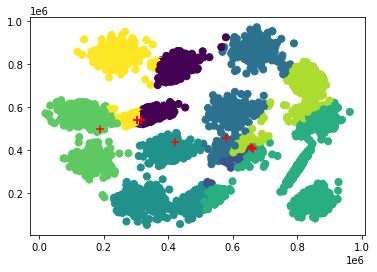

In [31]:
c = Cluster()
centroids,final_clusters = c.cluster(ds2,15,10,10)
c.show(ds2,centroids,final_clusters)

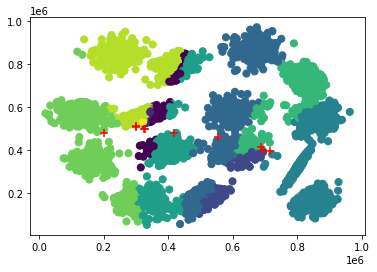

In [32]:
c = Cluster2()
centroids,final_clusters = c.cluster(ds2,15,10)
c.show(ds2,centroids,final_clusters)

In [33]:
class Cluster3:
    def __init__(self):
        pass
    def cluster(self,ds,t,x):
        # division by zero constant
        epsilon = 1e-5

        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        t = t*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features


        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)

        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))

            
        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters = np.zeros((N,N))
        
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters[i,idx] = 1    
            
        
        # recompute centroids
        
        centroids = (ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).sum(axis=1)/(epsilon+np.reshape(np.tile(clusters.sum(axis=0),(1,1)),(N,1)))
            
        # pick top x clusters
        topx = np.argsort(clusters.sum(axis=0))[-x:]
#         topx = np.argsort((ds_*np.reshape(np.tile(clusters.T,(1,1,1)),(N,N,1))).std(axis=1))[:x]
        centroids = centroids[topx]
        
        # retain only those examples that belong to the best clusters
        # get rid of the rest
        
        final_ex = np.zeros((1,n)) 
        final_c = np.zeros((1))
        for c in range(x):
            cr = topx[c] # cluster to retain
            
            d_ = ds[clusters[:,cr] == 1]
            L = d_.shape[0]
            final_ex = np.concatenate((final_ex,d_))
            final_c = np.concatenate((final_c,np.array([cr]*L)))
            
            
        
            
        return final_ex[1:,:],centroids,final_c[1:]
    
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:2]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        
        

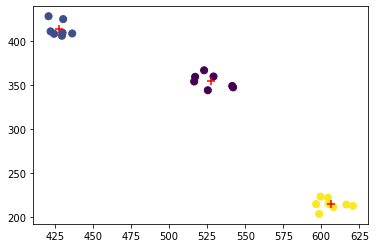

In [34]:
c = Cluster3()
ds_,centroids,final_clusters = c.cluster(ds,15,3)
c.show(ds_,centroids,final_clusters)

In [91]:
class Cluster4:
    def __init__(self):
        pass
    def cluster(self,ds,t,x):
        
        # division by zero constant
        epsilon = 1e-5


        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        # percent
        t = t*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features
        
        self.n = n

        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)


        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters = np.zeros((N,N))
        final_clusters = np.zeros((N,1))
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters[i,idx] = 1    
            final_clusters[i] = idx



        # maximum populated clusters
        
        topx = np.argsort(clusters.sum(axis=0))[-x:]

        final_ex = np.zeros((1,n)) 
        final_c = np.zeros((1))
        final_centroids = np.zeros((1,n))
        
        for c in range(x):
            cr = topx[c] # cluster to retain

            d_ = ds[clusters[:,cr] == 1]
            L = d_.shape[0]
            final_ex = np.concatenate((final_ex,d_))
            final_c = np.concatenate((final_c,np.array([c]*L)))
            final_centroids = np.concatenate((final_centroids,np.reshape(np.mean(d_,axis=0),(1,n))))

        final_ex = final_ex[1:,:]
        final_centroids = final_centroids[1:,:]
        final_c = final_c[1:]
        
        return final_ex,final_centroids,final_c
        
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:self.n]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        


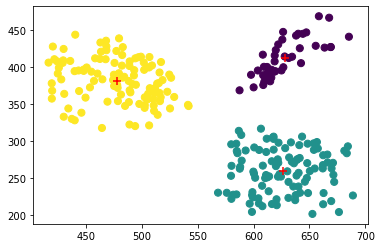

In [92]:
c = Cluster4()
ds_,final_centroids,final_clusters = c.cluster(ds,80,3)
c.show(ds_,final_centroids,final_clusters)

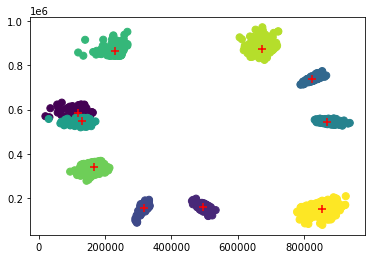

In [96]:
c = Cluster4()
ds_,final_centroids,final_clusters = c.cluster(ds2,25,10)
c.show(ds_,final_centroids,final_clusters)

In [110]:
class Cluster5:
    def __init__(self):
        pass
    def cluster(self,ds,t,x):
        
        # division by zero constant
        epsilon = 1e-5


        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        # percent
        t = t*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features
        
        self.n = n

        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)


        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters = np.zeros((N,N))
        final_clusters = np.zeros((N,1))
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters[i,idx] = 1    
            final_clusters[i] = idx



        # maximum populated clusters
        
        topx = np.argsort(clusters.sum(axis=0))[-x:]

         
        final_centroids = np.zeros((1,n))
        
        final_c = np.zeros((N,1))
        
        for c in range(x):
            
            cr = topx[c] # cluster to retain

            d_ = ds[clusters[:,cr] == 1]
            final_centroids = np.concatenate((final_centroids,np.reshape(np.mean(d_,axis=0),(1,n))))
            
        final_centroids = final_centroids[1:,:]
            
        # assign all examples to these clusters
        
        for i in range(N):
            
            dist = np.sqrt(np.sum((ds[i,:] - final_centroids)**2,axis=1))
            final_c[i] = np.argmin(dist)

                
        return ds,final_centroids,final_c
        
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:self.n]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        


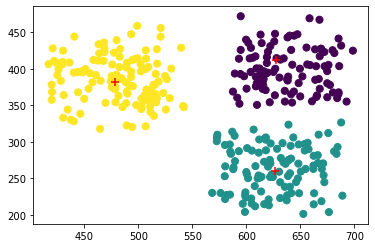

In [129]:
c = Cluster5()
ds_,final_centroids,final_clusters = c.cluster(ds,80,3)
c.show(ds_,final_centroids,final_clusters)

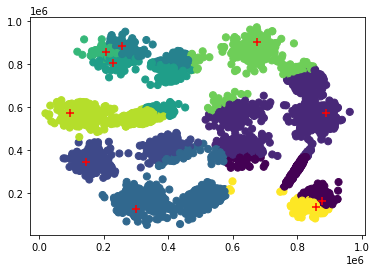

In [130]:
c = Cluster5()
ds_,final_centroids,final_clusters = c.cluster(ds2,15,10)
c.show(ds_,final_centroids,final_clusters)

In [150]:
class Cluster6:
    def __init__(self):
        pass
    def cluster(self,ds,t,x):
        
        # division by zero constant
        epsilon = 1e-5


        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        # percent
        t = t*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features
        
        self.n = n

        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)


        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters = np.zeros((N,N))
        final_clusters = np.zeros((N,1))
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters[i,idx] = 1    
            final_clusters[i] = idx



        # maximum populated clusters
        
        x = int(x*N)
        
        cluster_sum = clusters.sum(axis=0)
        topx = [i for i in range(N) if cluster_sum[i]>x] 
        
        final_ex = np.zeros((1,n)) 
        final_c = np.zeros((1))
        final_centroids = np.zeros((1,n))
        
        for c in range(len(topx)):
            
            cr = topx[c]
            d_ = ds[clusters[:,cr] == 1]
            L = d_.shape[0]
            final_ex = np.concatenate((final_ex,d_))
            final_c = np.concatenate((final_c,np.array([c]*L)))
            final_centroids = np.concatenate((final_centroids,np.reshape(np.mean(d_,axis=0),(1,n))))

        final_ex = final_ex[1:,:]
        final_centroids = final_centroids[1:,:]
        final_c = final_c[1:]
        
        
        return final_ex,final_centroids,final_c
        
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:self.n]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        
        


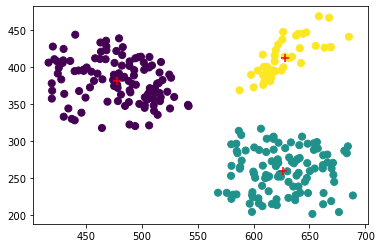

In [151]:
c = Cluster6()
ds_,final_centroids,final_clusters = c.cluster(ds,80,0.121)
c.show(ds_,final_centroids,final_clusters)

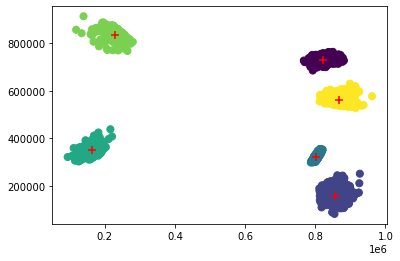

In [152]:
c = Cluster6()
ds_,final_centroids,final_clusters = c.cluster(ds2,30,0.04)
c.show(ds_,final_centroids,final_clusters)

In [153]:
class Cluster7:
    def __init__(self):
        pass
    def cluster(self,ds,t,x):
        
        # division by zero constant
        epsilon = 1e-5


        # range of values for attributes
        # range is an n-dim row vector for n attributes
        r = ds.max(axis=0) - ds.min(axis=0)

        # tolerance 
        # percent
        t = t*.01

        # cluster assignment step 1

        N = ds.shape[0] # number of examples
        n = ds.shape[1] # number of features
        
        self.n = n

        ds_ = np.tile(ds,(N,1,1))  # repeat along new dimension to have shape (N,N,n)


        # number of attributes matching between each pair of examples
        attributes = np.sum(np.abs(ds_ - np.reshape(np.tile(ds,(1,1,1)),(N,1,n))) < t*r, axis = 2) 
        mask = attributes == n

        # cluster count
        cluster_count = mask.sum(axis=0)
        mask_ = np.reshape(np.tile(mask,(1,1,1)),(N,N,1))
        centroids = (mask_*ds_).sum(axis=1)/np.reshape(np.tile(cluster_count,(1,1)),(N,1))


        # for multiple memberships, use Eucledian distance measure to find best cluster for each example
        clusters = np.zeros((N,N))
        final_clusters = np.zeros((N,1))
        for i in range(N):
            d = np.sqrt(np.sum((ds[i,:] - centroids)**2,axis=1))
            idx = np.argmin(d)
            clusters[i,idx] = 1    
            final_clusters[i] = idx


        
        # maximum populated clusters
        
        x = int(x*N)
        
        cluster_sum = clusters.sum(axis=0)
        topx = [i for i in range(N) if cluster_sum[i]>x] 

         
        final_centroids = np.zeros((1,n))
        
        final_c = np.zeros((N,1))
        
        for c in range(len(topx)):
            
            cr = topx[c] # cluster to retain

            d_ = ds[clusters[:,cr] == 1]
            final_centroids = np.concatenate((final_centroids,np.reshape(np.mean(d_,axis=0),(1,n))))
            
        final_centroids = final_centroids[1:,:]
            
        # assign all examples to these clusters
        
        for i in range(N):
            
            dist = np.sqrt(np.sum((ds[i,:] - final_centroids)**2,axis=1))
            final_c[i] = np.argmin(dist)

                
        return ds,final_centroids,final_c
        
    def show(self,ds,centroids,final_clusters):
        
        x = ds[:,0]
        y = ds[:,1]


        Cluster = final_clusters
        centers = centroids[:,:self.n]

        fig = plt.figure()
        ax = fig.add_subplot(111)

        scatter = ax.scatter(x, y, c=Cluster, s=50)
        for i, j in centers:
            ax.scatter(i, j, s=50, c='red', marker='+')

        plt.show()
        


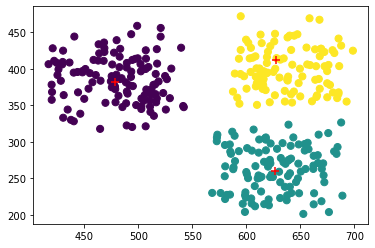

In [154]:
c = Cluster7()
ds_,final_centroids,final_clusters = c.cluster(ds,80,0.121)
c.show(ds_,final_centroids,final_clusters)

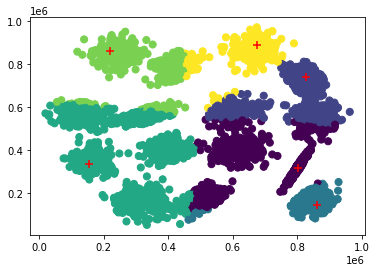

In [162]:
c = Cluster7()
ds_,final_centroids,final_clusters = c.cluster(ds2,20,0.02)
c.show(ds_,final_centroids,final_clusters)

In [163]:
df = pd.read_csv('wine-clustering.csv')
dfarr = df.to_numpy()

In [171]:
# normalise
dfarr = dfarr/(dfarr.max(axis=0)-dfarr.min(axis=0))

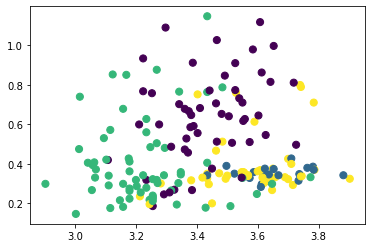

In [176]:
c = Cluster5()
ds_,final_centroids,final_clusters = c.cluster(dfarr,25,4)
# c.show(ds_,final_centroids,final_clusters)

x = ds_[:,0]
y = ds_[:,1]


Cluster = final_clusters
centers = final_centroids

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, c=Cluster, s=50)
